In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from yellowbrick.features import rank2d
from yellowbrick.target.feature_correlation import feature_correlation
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import partial_dependence,PartialDependenceDisplay,permutation_importance
import warnings
warnings.filterwarnings('ignore')

def grp2idx(c):
    label_encoder = LabelEncoder()
    return label_encoder.fit_transform(c)

class Module:
    def __init__(self,filePath,targetClass,cvRate,isKnn,isNB,isDT):
        self.filePath = filePath
        self.targetClass = targetClass
        self.cvRate = cvRate
        self.isKnn = isKnn
        self.isNB = isNB
        self.isDT = isDT
        
    def moduleTrainandTest(self):
        
        df = pd.read_csv(self.filePath)
        features = df.columns.name
        
        for column in df.columns:
            median = df[column].median()
            df[column] = df[column].fillna(median)
            if df[column].dtype == 'object' or df[column].dtype == 'string' :  
                for i in range(len(df)):
                    if isinstance(df[column][i], str):  
                        df[column] = grp2idx(df[column]) 
        
        
        Y = df[[self.targetClass]]
        df = df.drop(self.targetClass,axis = 1)
        X = df
        
        Y = np.ravel(Y)
        try:
            rank2d(df, algorithm='pearson');
        except:
            print("Dimension Error ,input array must be 2-d\n")

        corr = df.corr() 
        corr.style.background_gradient(cmap='coolwarm')
        feature_correlation(X, Y, method='mutual_info-classification',labels=features)
        
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=self.cvRate,random_state=True)
        
        
        if self.isKnn == True:
            modelKNN = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
            modelKNN.fit(x_train, y_train)
            tahminKNN = modelKNN.predict(x_test)
            print("KNN algoritması")
            print(classification_report(y_test,tahminKNN))
            cmKNN = confusion_matrix(tahminKNN, y_test)
            y_scoreKNN = modelKNN.predict_proba(x_test)
            try:
                fprKNN, tprKNN, thresholdKNN = roc_curve(y_test, y_scoreKNN[:, 1])
                roc_aucKNN = auc(fprKNN, tprKNN)
                plt.title('Receiver Operating Characteristic')
                plt.plot(fprKNN, tprKNN,'b', label = 'KNN için AUC = %0.2f' % roc_aucKNN)
                plt.ylabel('True Positive Rate')
                plt.xlabel('False Positive Rate')
                plt.plot([0, 1], [0, 1],'r--')
                plt.xlim([0, 1])
                plt.ylim([0, 1])
                plt.show()
            except :
                print("ROC curve is not creating. Something went wrong , multiclass format is not supported\n")
            
                
        
        if self.isDT == True:
            modelDT = tree.DecisionTreeClassifier()
            modelDT.fit(x_train,y_train)
            tahminDT = modelDT.predict(x_test)
            print("Karar Ağacı algoritması")
            print(classification_report(y_test,tahminDT))
            print("*"*50)
            print(tree.export_text(modelDT,feature_names=features))
            print("*"*50)
            cmDT = confusion_matrix(tahminDT, y_test)
            y_scoreDT = modelDT.predict_proba(x_test)
            try:
                fprDT, tprDT, thresholdDT = roc_curve(y_test, y_scoreDT[:, 1])
                roc_aucDT = auc(fprDT, tprDT)
                plt.title('Receiver Operating Characteristic')
                plt.plot(fprDT, tprDT, 'k', label = 'Karar ağacı için AUC = %0.2f' % roc_aucDT)
                plt.ylabel('True Positive Rate')
                plt.xlabel('False Positive Rate')
                plt.plot([0, 1], [0, 1],'r--')
                plt.xlim([0, 1])
                plt.ylim([0, 1])
                plt.show()
            except:
                print("ROC curve is not creating. Something went wrong , multiclass format is not supported\n")
        
        if self.isNB == True :
            modelNB = GaussianNB()
            modelNB.fit(x_train,y_train)
            tahminNB = modelNB.predict(x_test)
            print("Naive Bayes algoritması")
            print(classification_report(y_test,tahminNB))
            cmNB = confusion_matrix(tahminNB, y_test)
            y_scoreNB = modelNB.predict_proba(x_test)
            try:
                fprNB, tprNB, thresholdNB = roc_curve(y_test, y_scoreNB[:, 1])
                roc_aucNB = auc(fprNB, tprNB)
                plt.title('Receiver Operating Characteristic')
                plt.plot(fprNB, tprNB, 'g', label = 'Naive Bayes için AUC = %0.2f' % roc_aucNB)
                plt.ylabel('True Positive Rate')
                plt.xlabel('False Positive Rate')
                plt.plot([0, 1], [0, 1],'r--')
                plt.xlim([0, 1])
                plt.ylim([0, 1])
                plt.show()
            except:
                print("ROC curve is not creating. Something went wrong , multiclass format is not supported\n")
            


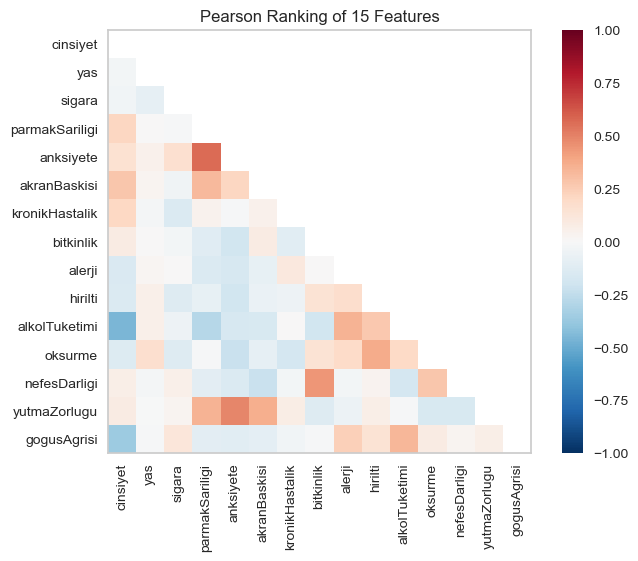

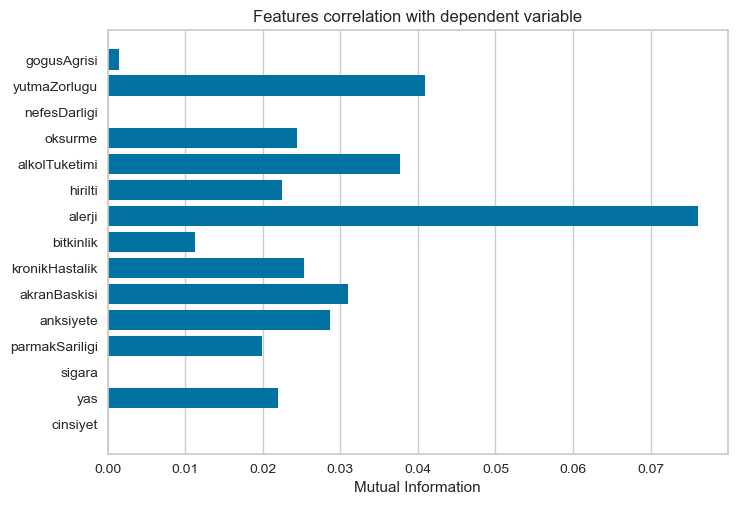

KNN algoritması
              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.93      0.94      0.93        84

    accuracy                           0.88        93
   macro avg       0.65      0.64      0.64        93
weighted avg       0.88      0.88      0.88        93



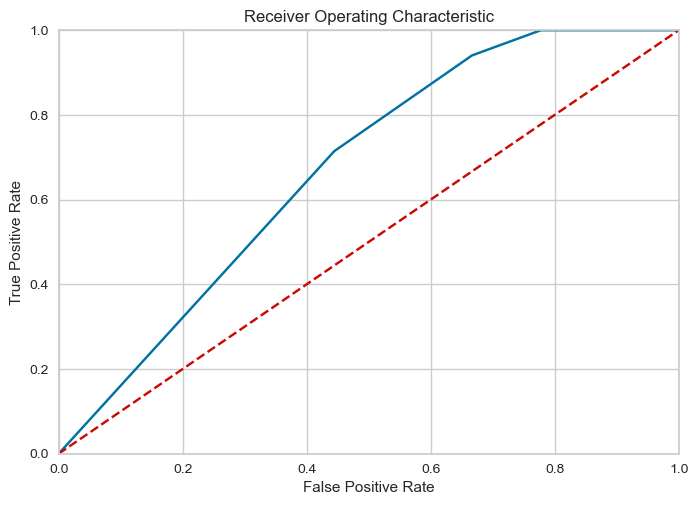

Karar Ağacı algoritması
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         9
           1       0.93      0.93      0.93        84

    accuracy                           0.87        93
   macro avg       0.63      0.63      0.63        93
weighted avg       0.87      0.87      0.87        93

**************************************************
|--- feature_11 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_14 <= 0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |   |--- f

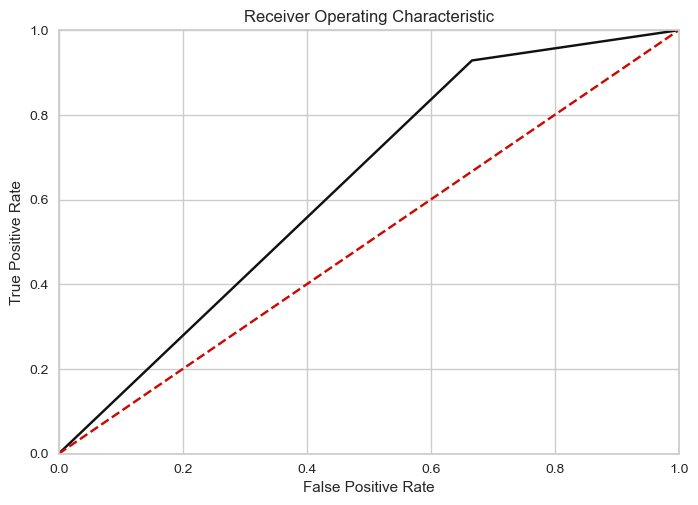

Naive Bayes algoritması
              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.94      0.93      0.93        84

    accuracy                           0.88        93
   macro avg       0.67      0.69      0.68        93
weighted avg       0.89      0.88      0.88        93



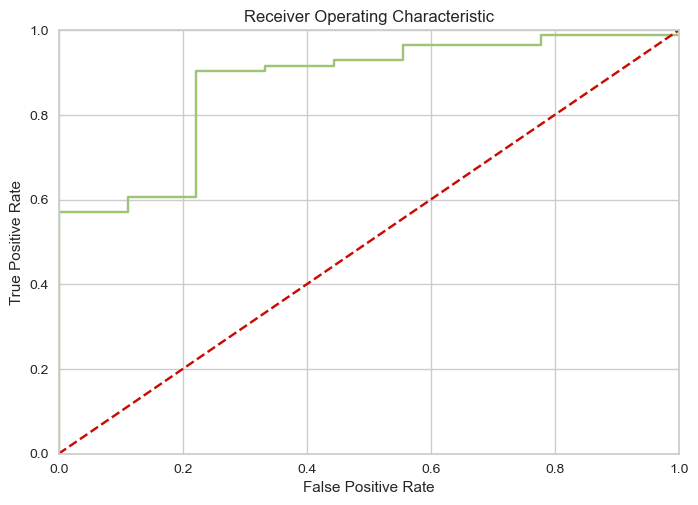

In [9]:
url  = 'https://raw.githubusercontent.com/rbaris/Lung-Cancer-Detection/main/lung-cancer/lung-cancer.csv'
file_path = url
target = 'akcigerKanseri'
CVRate = 0.3
isKnn = True
isDT = True
isNB = True

ModuleofCoach = Module(file_path,target,CVRate,isKnn,isDT,isNB)
ModuleofCoach.moduleTrainandTest()